In [1]:
import numpy as np
import scipy.stats as stats

# Simulamos datos con una distribución Gamma y una cola Pareto
np.random.seed(42)
data_body = stats.gamma.rvs(a=2, scale=2, size=800)  # Parte Gamma
data_tail = stats.pareto.rvs(b=3, scale=10, size=200)  # Cola Pareto
data = np.concatenate([data_body, data_tail])
data.sort()

# Posibles valores de x_c (percentiles altos)
xc_candidates = np.percentile(data, [80, 85, 90, 95])

best_xc = None
best_ks = np.inf

for xc in xc_candidates:
    # Separar datos
    body = data[data < xc]
    tail = data[data >= xc]
    
    # Ajustar Gamma a la parte antes del corte
    alpha, loc, beta = stats.gamma.fit(body, floc=0) #Parametros de la gamma
    ks_body = stats.kstest(body, 'gamma', args=(alpha, loc, beta)).statistic

    # Ajustar Pareto a la cola
    xi, loc, scale = stats.pareto.fit(tail, floc=xc) #Parametros de la pareto
    ks_tail = stats.kstest(tail, 'pareto', args=(xi, loc, scale)).statistic 

    # Evaluamos la suma de errores KS
    total_ks = ks_body + ks_tail

    # Guardamos el mejor x_c
    if total_ks < best_ks:
        best_ks = total_ks
        best_xc = xc

print(f"Mejor x_c encontrado: {best_xc}")

Mejor x_c encontrado: 15.836926233805205


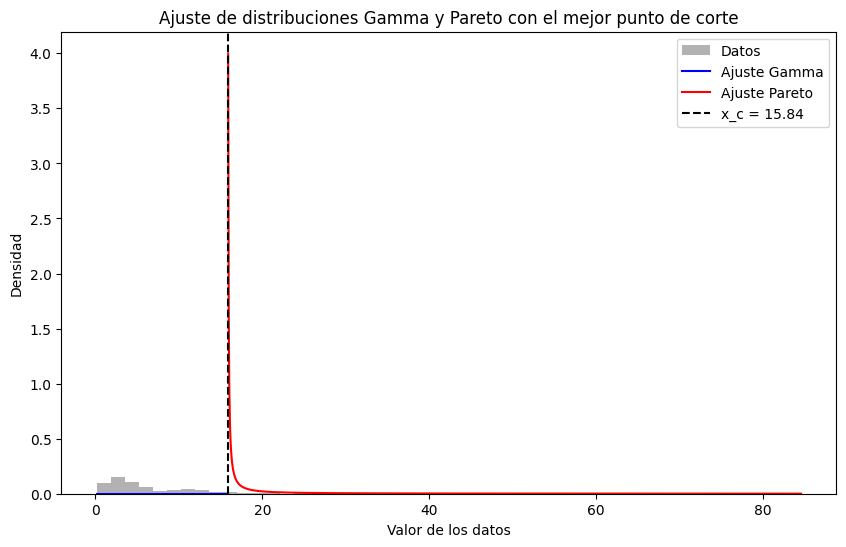

In [2]:
# Graficar los datos y el ajuste de distribuciones
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Histograma de los datos
plt.hist(data, bins=50, density=True, alpha=0.6, color='gray', label='Datos')

# Graficar el ajuste Gamma para la parte baja
x_body = np.linspace(min(body), max(body), 1000)
gamma_pdf = stats.gamma.pdf(x_body, a=alpha, loc=loc, scale=beta)
plt.plot(x_body, gamma_pdf, 'b-', label='Ajuste Gamma')

# Graficar el ajuste Pareto para la parte alta
x_tail = np.linspace(min(tail), max(tail), 1000)
pareto_pdf = stats.pareto.pdf(x_tail, b=xi, loc=loc, scale=scale)
plt.plot(x_tail, pareto_pdf, 'r-', label='Ajuste Pareto')

# Líneas de separación
plt.axvline(x=best_xc, color='k', linestyle='--', label=f'x_c = {best_xc:.2f}')

# Etiquetas y leyenda
plt.title('Ajuste de distribuciones Gamma y Pareto con el mejor punto de corte')
plt.xlabel('Valor de los datos')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()
